# Flower Classification Using ConvNet

* St. Name: Hiba Nabeel Zalloum
* St. Number:  22027007 
* Supervisior: Dr. Iyad Al-Shami

### Computer Vision with deep learning:

#### Introduction:
Flower classification is one of the most important areas to be studied through scientific research in the fields of artificial intelligence and deep learning. 
Some flowers are similar to each other and therefore difficult for computers to recognition between each other. It is an open field of study through special scientific research in the fields of computer vision.

#### convolutional neural networks(CNN): 

They are comprised of node layers, containing an input layer, one or more hidden layers, and an output layer. Each node connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.
are commonly used for natural language processing and speech recognition whereas convolutional neural networks (ConvNets or CNNs) are more often utilized for classification and computer vision tasks. Prior to CNNs, manual, time-consuming feature extraction methods were used to identify objects in images.

Convolutional neural networks are distinguished from other neural networks by their superior performance with image, speech, or audio signal inputs. They have three main types of layers, which are:

* Convolutional layer
* Pooling layer
* Fully-connected (FC) layer



# Flower Classification Implemenation steps : 
* import labrariy 
* Accessing files and specifying features and targets
* transofrm train data to Matrix 
* Normalizing train data between 0 to 1
* preprocsessing labels (targets) Using Dummies 
* make target and featuers unique values 
* suffling data through unioun list 
* slipting data to train and test 
* buliding model 
* model compile and history 
* ploting 


In [1]:
import glob
import cv2
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers
import random
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.layers import Activation

# preproscessing 

In [2]:
flower_file= ['Daffodil', 'Daisy','Iris', 'Sunflower', 'Windflower']
featuers = []
target =[]

for file in flower_file: 
    path = r'./Flowers/'+ file +'/*.jpg'
    folders =glob.glob(path)
    
    
    for folder in folders:
        image = cv2.imread(folder)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = resize(image,(64,64))
        featuers.append(image)
        target.append(file)

In [3]:
# Transform the image array to a numpy type

train = np.array(featuers)

train.shape

(400, 64, 64, 3)

In [4]:
# Reduce the RGB values between 0 and 1

train = train.astype('float32') / 255.0

In [5]:
# Extract the labels

label_dummies = pandas.get_dummies(target)

labels =  label_dummies.values.argmax(1)

In [6]:
pandas.unique(target)
pandas.unique(labels)

array([0, 1, 2, 3, 4], dtype=int64)

In [7]:
# Shuffle the labels and images randomly for better results

union_list = list(zip(train, labels))
random.shuffle(union_list)
train,labels = zip(*union_list)

# Convert the shuffled list to numpy array type

train = np.array(train)
labels = np.array(labels)

#train[0]

# spliting data and build Model

In [8]:
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.10, random_state=42)

In [9]:
model = keras.Sequential()
model.add(layers.Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          9

In [10]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy()
              ,metrics=['accuracy'])
# train the model
history = model.fit(train,labels , epochs=30, batch_size =100 ,
                    validation_data=(x_test, y_test))

Epoch 1/30
4/4 [==============================] - 1s 169ms/step - loss: 1.6097 - accuracy: 0.1850 - val_loss: 1.6088 - val_accuracy: 0.2250
Epoch 2/30
4/4 [==============================] - 0s 96ms/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2250
Epoch 3/30
4/4 [==============================] - 0s 85ms/step - loss: 1.6094 - accuracy: 0.2000 - val_loss: 1.6088 - val_accuracy: 0.2250
Epoch 4/30
4/4 [==============================] - 0s 87ms/step - loss: 1.6094 - accuracy: 0.1875 - val_loss: 1.6076 - val_accuracy: 0.3250
Epoch 5/30
4/4 [==============================] - 0s 89ms/step - loss: 1.6092 - accuracy: 0.2000 - val_loss: 1.6070 - val_accuracy: 0.3250
Epoch 6/30
4/4 [==============================] - 0s 86ms/step - loss: 1.6092 - accuracy: 0.2000 - val_loss: 1.6071 - val_accuracy: 0.3250
Epoch 7/30
4/4 [==============================] - 0s 81ms/step - loss: 1.6090 - accuracy: 0.2000 - val_loss: 1.6066 - val_accuracy: 0.3250
Epoch 8/30
4/4 [==========

# plots

2/2 - 0s - loss: 1.0573 - accuracy: 0.5500


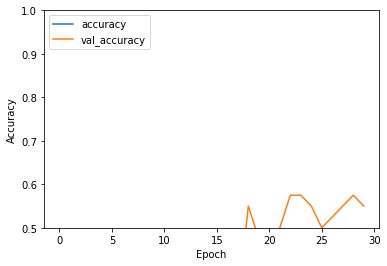

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='upper left')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [12]:
print(test_acc)


0.550000011920929


In [13]:
# predict test set
clf = model.predict(x_test, verbose=0)

In [14]:
print(metrics.classification_report(y_test, np.argmax(clf, axis = 1)))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.73      0.85      0.79        13
           2       0.50      0.25      0.33         4
           3       0.47      1.00      0.64         7
           4       0.50      0.33      0.40         9

    accuracy                           0.55        40
   macro avg       0.44      0.49      0.43        40
weighted avg       0.48      0.55      0.49        40



In [15]:
cm = confusion_matrix(y_test, np.argmax(clf, axis = 1))

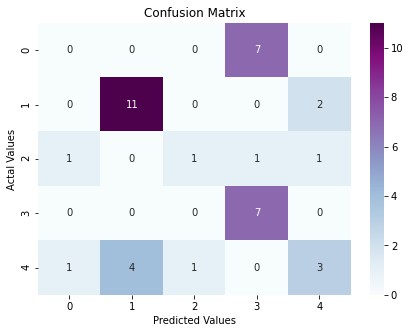

In [16]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, cmap="BuPu")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### result: 

we need to change parameter such as minibatch size, number of epoches , output layer activation function, hidden layer and kernal size to get more effecifint result we got have 55% of accuracy.. so the model is bad :( 
 